# PyCon 2019: Data Science Best Practices with pandas ([video](https://www.youtube.com/watch?v=dPwLlJkSHLo&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=36))

### GitHub repository: https://github.com/justmarkham/pycon-2019-tutorial

### Instructor: Kevin Markham

- Website: https://www.dataschool.io
- YouTube: https://www.youtube.com/dataschool
- Patreon: https://www.patreon.com/dataschool
- Twitter: https://twitter.com/justmarkham
- GitHub: https://github.com/justmarkham

## 1. Introduction to the TED Talks dataset

https://www.kaggle.com/rounakbanik/ted-talks

In [1]:
import pandas as pd
pd.__version__
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *

calling ds_preamble..
calling ds_helper...


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ted = pd.read_csv('ted.csv')

In [4]:
ted.info()
ted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
# Q2
ted.loc[ted.comments.div(ted.views).nlargest(10).index][['name']]

,name
744,Diane J. Savino: The case for same-sex marriage
803,David Bismark: E-voting without fraud
96,Richard Dawkins: Militant atheism
694,Sharmeen Obaid-Chinoy: Inside a school for sui...
954,Janet Echelman: Taking imagination seriously
840,Lesley Hazleton: On reading the Koran
876,Elizabeth Lindsey: Curating humanity's heritage
1787,David Chalmers: How do you explain consciousness?
661,Michael Specter: The danger of science denial
561,Mallika Sarabhai: Dance to change the world


(32, 17)

[None]

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

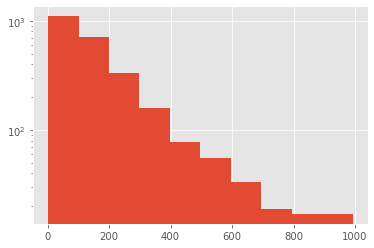

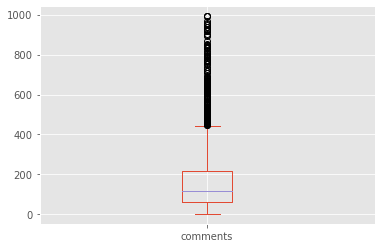

In [6]:
# Q3
# ted.comments.hist(bins=20).set(yscale='log')
ted.query("comments>=1000").shape
ted.query("comments<1000").comments.hist().set(yscale='log')

plt.figure()
ted.query("comments<1000").comments.plot.box()


<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

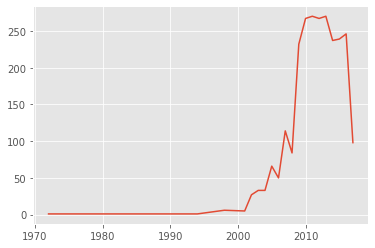

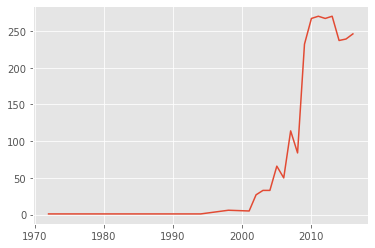

In [7]:
# Q4
ted['date'] = pd.to_datetime(ted.film_date, unit='s')
# ted.film_date
# ted.groupby(ted.date.dt.year).size().sort_index().plot()
# ted.date.dt.year.value_counts().sort_index().plot()

plt.figure()
ted.date.dt.year.value_counts().sort_index().plot()
plt.figure()
ted.date[lambda s: s<'2017'].dt.year.value_counts().sort_index().plot()


In [8]:
# Q5
# ted.event.value_counts()

# mean views in each event
ted.groupby('event').views.agg(['mean','sum','count']).sort_values('mean', ascending=False)

,mean,sum,count
event,,,
TEDxPuget Sound,34309432.0,34309432,1
TEDxHouston,16140250.5,32280501,2
TEDxBloomington,9484259.5,18968519,2
TEDxCreativeCoast,8444981.0,8444981,1
TEDxNorrkoping,6569493.0,6569493,1
...,...,...,...
TEDxNASA@SiliconValley,155895.0,155895,1
AORN Congress,149818.0,149818,1
TEDxWaterloo,138812.0,138812,1


In [9]:
# Q6
import ast
# ted.ratings[0]

# pd.DataFrame(ast.literal_eval(ted.ratings[0]))
# ast.literal_eval(ted.ratings[0])


ted['rating_list'] = ted.ratings.apply(lambda s: ast.literal_eval(s))

In [10]:
# Q7
# pd.DataFrame(ted.rating_list[0])['count'].sum()

ted['n_ratings'] = ted.rating_list.apply(lambda s: pd.DataFrame(s)['count'].sum())

In [11]:
# ted.speaker_occupation.value_counts()

# n_funny = ted.rating_list.apply(lambda s: pd.DataFrame(s).name.eq('Funny').sum() )
# pd.DataFrame(ted['rating_list'][5]).name.eq('Funny').sum()
# pd.DataFrame(ted['rating_list'][5]).query("name=='Funny'")

n_funny = ted.rating_list.apply(lambda s: pd.DataFrame(s).query("name =='Funny'")['count'].sum())
# pd.DataFrame(ted['rating_list'][5]).query("name == 'Funny'")['count'].sum()

n_funny

# pd.DataFrame(ted['rating_list'][5]).query("name == Funny")

0       19645
1         544
2         964
3          59
4        1390
        ...  
2545        1
2546       20
2547        1
2548       63
2549        0
Name: rating_list, Length: 2550, dtype: int64

In [15]:
ted.ratings[0]
eval(ted.ratings[0])

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]